# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

# Pandas

- Pandas es "Python Data Analysis Library". El nombre proviene del término *Panel Data* que es un término econométrico para manejar conjuntos de datos multidimensionales.

- Pandas es una biblioteca que provee de herramientas de alto desempeño, fáciles de usar, para manejar estructuras de datos y para su análisis. 

- Pandas es un módulo que reúne las capacidades de Numpy, Scipy y Matplotlib.

- Véase https://pandas.pydata.org/ para más información.

- y en: https://vimeo.com/59324550




In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

## Series

- Las `Series` son arreglos unidimensionales indexados basados en los arreglos de Numpy.
- Pueden almacenar cualquier tipo de dato: int, floats, strings, Python objects, etc.
- Se pueden ver como una estructura de datos con dos arreglos: uno para los índices y otro para los objetos que contiene.

### Ejemplo

In [2]:
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [3]:
obj.values # Objetos de la serie

array([ 3,  6,  9, 12])

In [4]:
obj.index # Índices de la serie

RangeIndex(start=0, stop=4, step=1)

- Comparemos con los array de Numpy

In [5]:
x = np.array([3,6,9,12])
x

array([ 3,  6,  9, 12])

In [6]:
print(type(obj.values))
print(type(x))
print(type(obj))
print(type(obj.index))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>


- Podemos definir los índices como queramos:

In [7]:
monedas = Series([10.0,5.0,2.0,1.0,0.5,0.2,0.1],
                 index=['Diez','Cinco','Dos','Un','cincuenta','veinte','diez'])
monedas

Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64

In [8]:
monedas['diez'] # Podemos acceder a los objetos de la Serie con el índice

0.1

In [9]:
print('{: .52f}'.format(monedas['diez']))

 0.1000000000000000055511151231257827021181583404541016


In [10]:
monedas[monedas > 0.3] # Podemos hacer operaciones más complicadas

Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
dtype: float64

In [11]:
'quarter' in monedas # Es posible preguntar si un índice está en la Serie

False

In [12]:
 0.1 in monedas.values  # Es posible preguntar si un objeto está en la Serie

True

# Transformación entre Series y tipos básicos de Python

In [13]:
# Es posible transformar la Serie en diferentes tipos

# Transformar la Serie en una lista
monedas_list = monedas.to_string()
print(type(monedas_list))
print(monedas_list)

<class 'str'>
Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1


In [14]:
# Transformar la Serie a un diccionario:
monedas_dic = monedas.to_dict()
print(type(monedas_dic))
monedas_dic

<class 'dict'>


{'Diez': 10.0,
 'Cinco': 5.0,
 'Dos': 2.0,
 'Un': 1.0,
 'cincuenta': 0.5,
 'veinte': 0.2,
 'diez': 0.1}

In [15]:
# Podemos transformar un diccionario en una Serie.
monedasX = Series(monedas_dic) # Regresa a la Serie pero en desorden
monedasX

Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64

In [16]:
# Transformar la Serie en el formato CSV:
f = open('MONEDAS.csv','w')
f.write(monedas.to_csv())
f.close()

### Ejercicio
- Crear una serie con sus índices iguales a los nombres de las delegaciones de la Ciudad de México y sus valores el número de habitantes por delegación.

Delegación | Habitantes
-- | --
Azcapotzalco | 400 161
Coyoacán | 608 479
Cuajimalpa de Morelos | 199 224
Gustavo A. Madero | 1 164 477
Iztacalco | 390 348
Iztapalapa | 1 827 868
La Magdalena Contreras | 243 886
Milpa Alta | 137 927
Álvaro Obregón | 749 982
Tláhuac | 361 593
Tlalpan | 677 104
Xochimilco | 415 933
Benito Juárez | 417 416
Cuauhtémoc | 532 553
Miguel Hidalgo | 364 439
Venustiano Carranza | 427 263

- Calcular la suma total de habitantes
- Imprimir los nombres de las delegaciones con mayor y menor número de habitantes.
- Imprimer los nombres de las delegaciones con más de 400,000 habitantes

In [17]:
fdel = open('delegaciones.csv','r')
valor = []
indices = []
for line in fdel:
    sline = line.split(sep=",")
    indices.append(sline[0])
    valor.append(sline[1])

print(indices, valor)

lista_delegacion = Series(valor[1:-1],index=indices[1:-1])
lista_delegacion

['Delegación', 'Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta', 'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez', 'Cuauhtémoc', 'Miguel Hidalgo', 'Venustiano Carranza'] ['Habitantes\n', '400161\n', '608479\n', '199224\n', '1164477\n', '390348\n', '1827868\n', '243886\n', '137927\n', '749982\n', '361593\n', '677104\n', '415933\n', '417416\n', '532553\n', '364439\n', '427263\n']


Azcapotzalco               400161\n
Coyoacán                   608479\n
Cuajimalpa de Morelos      199224\n
Gustavo A. Madero         1164477\n
Iztacalco                  390348\n
Iztapalapa                1827868\n
La Magdalena Contreras     243886\n
Milpa Alta                 137927\n
Álvaro Obregón             749982\n
Tláhuac                    361593\n
Tlalpan                    677104\n
Xochimilco                 415933\n
Benito Juárez              417416\n
Cuauhtémoc                 532553\n
Miguel Hidalgo             364439\n
dtype: object

# Algunas operaciones con series

In [18]:
# Si queremos la serie en orden, lo podemos hacer vía los índices:
etiquetas = ['Diez','Cinco','Dos','Un','cincuenta','veinte','diez']
monedasY = Series(monedas_dic, index=etiquetas) # En orden!
monedasY

Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64

In [19]:
# Incluso podemos agregar índices a los originales
etiquetas = ['Diez','Cinco','quarter','Dos','Un','cincuenta','veinte','diez']
monedasZ = Series(monedas_dic, index=etiquetas) # Hay un índice extra.
monedasZ

Diez         10.0
Cinco         5.0
quarter       NaN
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64

In [20]:
# Podemos verificar si hay datos faltantes (NaN)
pd.isnull(monedasZ['quarter'])     # Operación de PANDAS

True

In [21]:
pd.notnull(monedasZ['diez'])   # Operación de PANDAS

True

In [22]:
# Podemos sumar dos Series
monedas + monedasY

Diez         20.0
Cinco        10.0
Dos           4.0
Un            2.0
cincuenta     1.0
veinte        0.4
diez          0.2
dtype: float64

In [23]:
# No importa que las series estén en desorden, la suma es correcta!
monedas + monedasX

Diez         20.0
Cinco        10.0
Dos           4.0
Un            2.0
cincuenta     1.0
veinte        0.4
diez          0.2
dtype: float64

In [24]:
# Incluso podemos sumar series que tengan diferente longitud:
monedasZ['quarter'] = 10
print(monedasZ)
print(monedas)
monedas['quarter'] = -10
monedas + monedasZ

Diez         10.0
Cinco         5.0
quarter      10.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64
Diez         10.0
Cinco         5.0
Dos           2.0
Un            1.0
cincuenta     0.5
veinte        0.2
diez          0.1
dtype: float64


Cinco        10.0
Diez         20.0
Dos           4.0
Un            2.0
cincuenta     1.0
diez          0.2
quarter       0.0
veinte        0.4
dtype: float64

In [25]:
# Las series tienen comportamiento, por ejemplo:
nombre = Series(list('Luis Miguel de la Cruz Salas'))
nombre.unique()

array(['L', 'u', 'i', 's', ' ', 'M', 'g', 'e', 'l', 'd', 'a', 'C', 'r',
       'z', 'S'], dtype=object)

In [26]:
# Puede contar los objetos que hay en la Serie
nombre.value_counts()

     5
u    3
l    3
a    3
s    2
e    2
i    2
g    1
S    1
z    1
L    1
d    1
r    1
C    1
M    1
dtype: int64

In [27]:
# Podemos tener una serie con índices en desorden:
serie = Series(range(5),index=['C','A','B','E','D'])
serie

C    0
A    1
B    2
E    3
D    4
dtype: int64

In [28]:
# La serie se puede ordenar a través de los índices
serie.sort_index()

A    1
B    2
C    0
D    4
E    3
dtype: int64

In [29]:
serie   # Ojo: el ordenamiento no se hizo "in place", es decir no se modificó la serie original

C    0
A    1
B    2
E    3
D    4
dtype: int64

In [30]:
# Aquí creamos una nueva serie ordenada, pero la original prevalece
serie_ordenada = serie.sort_index()

In [31]:
serie_ordenada

A    1
B    2
C    0
D    4
E    3
dtype: int64

In [32]:
serie

C    0
A    1
B    2
E    3
D    4
dtype: int64

In [33]:
# Podemos ordenar la serie "in place", es decir se modifica la serie original
serie.sort_index(inplace=True)
serie

A    1
B    2
C    0
D    4
E    3
dtype: int64

In [34]:
# Se puede ordenar la serie usando los objetos que contiene
serie.sort_values()

C    0
A    1
B    2
E    3
D    4
dtype: int64

In [35]:
# Creamos otra serie con valores e índices desordenados
serie = Series([7,5,2,8,3],index=['C','A','B','E','D'])
serie

C    7
A    5
B    2
E    8
D    3
dtype: int64

In [36]:
# La siguiente función "rankea" las entradas de la serie de acuerdo al contenido de su objeto
serie.rank()

C    4.0
A    3.0
B    1.0
E    5.0
D    2.0
dtype: float64

In [37]:
# Si ordenamos la serie que pasa ¿?:
serie.sort_values()

B    2
D    3
A    5
C    7
E    8
dtype: int64

In [38]:
# Se pueden usar varias de las funciones de Numpy
serie + 3

C    10
A     8
B     5
E    11
D     6
dtype: int64

In [39]:
serie**2

C    49
A    25
B     4
E    64
D     9
dtype: int64

In [40]:
np.sin(serie)

C    0.656987
A   -0.958924
B    0.909297
E    0.989358
D    0.141120
dtype: float64

In [41]:
# Keep digging please!!

### La función `apply`
```python
Series.apply(func, conver_dtype=True, args(), **kwds)
```
- La función `func` será aplicada a la serie y regresa un objeto de tipo Series o DataFrame.


In [42]:
s = serie.apply(np.sin)
print(type(s))

<class 'pandas.core.series.Series'>


- Podemos usar funciones lambda

In [43]:
serie

C    7
A    5
B    2
E    8
D    3
dtype: int64

In [44]:
serie.apply(lambda x: x if x > 5 else x**2)

C     7
A    25
B     4
E     8
D     9
dtype: int64

### Filtrar o completar datos faltantes

In [45]:
monedas['penny'] = 150000
monedas
monedas + monedasZ

Cinco        10.0
Diez         20.0
Dos           4.0
Un            2.0
cincuenta     1.0
diez          0.2
penny         NaN
quarter       0.0
veinte        0.4
dtype: float64

In [46]:
nueva_serie = monedas + monedasZ
nueva_serie

Cinco        10.0
Diez         20.0
Dos           4.0
Un            2.0
cincuenta     1.0
diez          0.2
penny         NaN
quarter       0.0
veinte        0.4
dtype: float64

In [47]:
nueva_serie.dropna() # Desecha los NaN 

Cinco        10.0
Diez         20.0
Dos           4.0
Un            2.0
cincuenta     1.0
diez          0.2
quarter       0.0
veinte        0.4
dtype: float64

In [48]:
nueva_serie.fillna(3000) # Completa los NaN con 3000

Cinco          10.0
Diez           20.0
Dos             4.0
Un              2.0
cincuenta       1.0
diez            0.2
penny        3000.0
quarter         0.0
veinte          0.4
dtype: float64

## DataFrames

- La idea principal de los DaraFrames se basa en las hojas de cálculo.
- La estructura de un DataFrame son tablas similares a las hojas de cálculo.
- Contiene una colección ordenada de columnas.
- Cada columna consiste de un tipo de dato único.
- Pero, diferentes columnas pueden tener diferens tipos: la primera columna podría contener cadenas, la segunda flotantes, la tercera Boleanos, etc.
- También tiene una columna de índice: es como un diccionario de Series con un índice común.


In [49]:
# Mi primer DataFrame
dframe = DataFrame(np.arange(12).reshape(4,3))

In [50]:
dframe

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


- En este ejemplo `dframe` se construye convirtiendo un arreglo multidimensional de **numpy** con la forma: 4 renglones X 3 columnas, en un objeto de tipo DataFrame, pre-llenado con los valores del 0 al 11. Los índices por omisión de los renglones van de 0 a 3 y los de las columnas de 0 a 2.  

In [51]:
type(dframe)

pandas.core.frame.DataFrame

## Construir un DataFrame a partir de un diccionario

In [52]:
datos = {'Delegación':['Coyoacán','Tlalpan','Xochimilco'],
         'Población':[837000,3880000,8400000]}
delegaciones = DataFrame(datos)
delegaciones

,Delegación,Población
0,Coyoacán,837000
1,Tlalpan,3880000
2,Xochimilco,8400000


## Agregar una Serie a un DataFrame

In [53]:
IMECAS = Series([90,100,120], index=[0,1,2])
print(IMECAS)
delegaciones['Cal. Aire'] = IMECAS
delegaciones

0     90
1    100
2    120
dtype: int64


,Delegación,Población,Cal. Aire
0,Coyoacán,837000,90
1,Tlalpan,3880000,100
2,Xochimilco,8400000,120


## Se puede leer información de archivos

In [54]:
df_pets = pd.read_table('pets.txt',sep=' ')
df_pets

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


## Leer un DataFrame de un sitio web

In [55]:
import webbrowser
website = 'http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

In [62]:
# Antes de ejecutar esta celda, seleccione los 10 primeros renglones
# de la tabla, incluyendo los títulos y copialos al clipboard, es decir
# teclear [Ctrl + c]

#-----------------------------------------------------------------------------
# Es probable que en Linux se obtenga un error. La forma de resolverlo es como sigue
#-----------------------------------------------------------------------------
#You may get an error message that says: “Pyperclip could not find a copy/paste mechanism for your system. Please see https://pyperclip.readthedocs.io/en/latest/introduction.html#not-implemented-error for how to fix this.”
#
#In order to work equally well on Windows, Mac, and Linux, Pyperclip uses various mechanisms to do this. Currently, this error should only appear on Linux (not Windows or Mac). You can fix this by installing one of the copy/paste mechanisms:
#
#    sudo apt-get install xsel to install the xsel utility.
#    sudo apt-get install xclip to install the xclip utility.
#    pip install gtk to install the gtk Python module.
#    pip install PyQt4 to install the PyQt4 Python module.
#-----------------------------------------------------------------------------
    
nfl_frame = pd.read_clipboard(engine='python')

In [57]:
# En caso de que lo anterior no funcione, 
# lea la información del archivo nfl_teams.txt
#nfl_frame = pd.read_table('nfl_teams.txt',sep='\t')
#nfl_frame

In [63]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,384",769,577,38,0.569,1921,NFC North
1,2,Dallas Cowboys,930,526,398,6,0.569,1960,NFC East
2,3,Baltimore Ravens,400,225,174,1,0.564,1996,AFC North
3,4,Chicago Bears,"1,418",777,599,42,0.563,1920,NFC North
4,5,New England Patriots,932,519,404,9,0.562,1960,AFC East
5,6,Miami Dolphins,848,467,377,4,0.553,1966,AFC East
6,7,Minnesota Vikings,918,495,412,11,0.545,1961,NFC North
7,8,Kansas City Chiefs,932,495,425,12,0.538,1960,AFC West
8,9,Pittsburgh Steelers,"1,220",643,556,21,0.536,1933,AFC North
9,10,San Francisco 49ers,"1,050",551,485,14,0.531,1950,NFC West


In [64]:
type(nfl_frame)

pandas.core.frame.DataFrame

In [65]:
nfl_frame.columns # Lista las columnas del DataFrame

Index(['Rank ', 'Team ', 'GP ', 'Won ', 'Lost ', 'Tied ', 'Pct. ',
       'First NFL season ', 'Division'],
      dtype='object')

In [67]:
nfl_frame['First NFL season '] # Imprime la columa que concide con "Total Games "

0     1921
1     1960
2     1996
3     1920
4     1960
5     1966
6     1961
7     1960
8     1933
9     1950
10    1925
11    1953
12    1960
13    1960
14    1976
15    1937
16    1932
17    1960
18    1950
19    1933
Name: First NFL season , dtype: int64

In [70]:
# Puedo crear un DataFrame eligiendo columnas de otro DataFrame
nuevo_DF = DataFrame(nfl_frame,columns=['Team ','First NFL season ','Won '])
nuevo_DF

,Team,First NFL season,Won
0,Green Bay Packers,1921,769
1,Dallas Cowboys,1960,526
2,Baltimore Ravens,1996,225
3,Chicago Bears,1920,777
4,New England Patriots,1960,519
5,Miami Dolphins,1966,467
6,Minnesota Vikings,1961,495
7,Kansas City Chiefs,1960,495
8,Pittsburgh Steelers,1933,643
9,San Francisco 49ers,1950,551


In [71]:
nfl_frame.head() # Los primeros 5 renglones

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,384",769,577,38,0.569,1921,NFC North
1,2,Dallas Cowboys,930,526,398,6,0.569,1960,NFC East
2,3,Baltimore Ravens,400,225,174,1,0.564,1996,AFC North
3,4,Chicago Bears,"1,418",777,599,42,0.563,1920,NFC North
4,5,New England Patriots,932,519,404,9,0.562,1960,AFC East


In [72]:
nfl_frame.head(3) # Los primeos 3 renglones

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,384",769,577,38,0.569,1921,NFC North
1,2,Dallas Cowboys,930,526,398,6,0.569,1960,NFC East
2,3,Baltimore Ravens,400,225,174,1,0.564,1996,AFC North


In [73]:
nfl_frame.tail(3) # Los últimos tres renglones

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
17,18,Los Angeles Chargers,932,459,462,11,0.498,1960,AFC West
18,19,Cleveland Browns[e],"1,002",486,505,11,0.491,1950,AFC North
19,20,Philadelphia Eagles,"1,236",590,619,27,0.488,1933,NFC East


In [74]:
nfl_frame.ix[3] # Ojo: esta función será eliminada en el futuro!

AttributeError: 'DataFrame' object has no attribute 'ix'

In [75]:
nfl_frame.loc[3] # La función ix ha sido sustituida por loc, que permite acceder a un renglón

Rank                              4
Team                 Chicago Bears 
GP                           1,418 
Won                             777
Lost                            599
Tied                             42
Pct.                          0.563
First NFL season               1920
Division                  NFC North
Name: 3, dtype: object

# Se pueden renombrar las columnas

In [76]:
dframe

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [77]:
dframe.rename(index={0:'a',1:'b',2:'c',3:'d'}, columns={0:'col1',1:'col2', 2:'col3'}, inplace=True)

In [78]:
dframe

,col1,col2,col3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [79]:
nfl_frame.head(2)

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,384",769,577,38,0.569,1921,NFC North
1,2,Dallas Cowboys,930,526,398,6,0.569,1960,NFC East


In [80]:
nfl_frame.rename(columns = {'Team ':'Equipo'}, inplace=True)

In [81]:
nfl_frame.head(2)

,Rank,Equipo,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,384",769,577,38,0.569,1921,NFC North
1,2,Dallas Cowboys,930,526,398,6,0.569,1960,NFC East


In [82]:
'Dallas Cowboys ' in nfl_frame.values

True

# Leyendo archivos CSV

In [83]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';') # Lectura de CSV

In [84]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
dframe_wine['alcohol'].mean() # Se puede calcular la media de una columna

10.422983114446502

In [86]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Agrupación, agregación y funciones definidas por el usuario

In [87]:
def difMaxMin(arr):
    """
    Calcula la diferencia entre el valor mínimo y máximo de un arreglo.
    """
    return arr.max() - arr.min()

In [88]:
wino = dframe_wine.groupby('quality') # Agrupa una serie
print(type(wino))                     # regresa un DataFrame agrupado
print(type(dframe_wine))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [89]:
print(wino) # Solo muestra el tipo de objeto

In [90]:
wino.describe() # Muestra el DataFrame agrupado

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

- Obsérvese que la función groupby() también calcula algunos datos estadísticos y ordena el resultado por el nombre de la columna (orden alfabético).

In [91]:
wino.agg(difMaxMin) # Ahora aplicamos nuestra función

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [92]:
wino.agg('mean') # También podemos aplicar una función ya definida en la biblioteca
                 # sum, min, max, std, count, ...

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Agregando una columna a nuestro DataFrame

In [93]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
# Agrega la columna realizando un cálculo entre valores de otras columnas
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [95]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [96]:
dframe_wine.head() # recordemos como es el DataFrame original

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


# Graficación con matplotlib

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

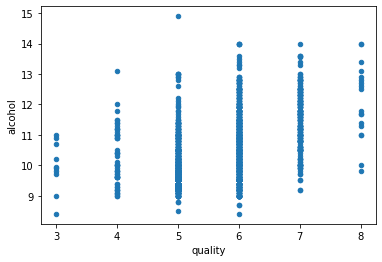

In [98]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

In [99]:
dframe_wine.sort_values('alcohol',ascending = False,inplace=True)

In [100]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571


In [101]:
num_of_qual = dframe_wine['quality'].value_counts()

In [102]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [103]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [104]:
dataset1 = np.random.randn(100)

(array([ 4.,  7.,  7., 16., 25., 18., 11.,  6.,  3.,  3.]),
 array([-2.17961245, -1.72834159, -1.27707073, -0.82579986, -0.374529  ,
         0.07674186,  0.52801272,  0.97928359,  1.43055445,  1.88182531,
         2.33309617]),
 <BarContainer object of 10 artists>)

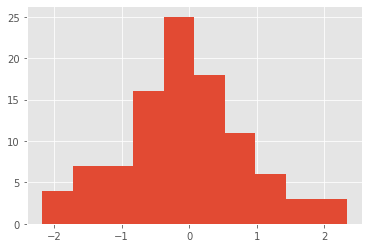

In [105]:
plt.hist(dataset1)

(array([ 5.,  6., 11., 15., 21., 10.,  5.,  4.,  0.,  3.]),
 array([-2.28485237, -1.758397  , -1.23194162, -0.70548625, -0.17903087,
         0.3474245 ,  0.87387988,  1.40033525,  1.92679063,  2.453246  ,
         2.97970138]),
 <BarContainer object of 10 artists>)

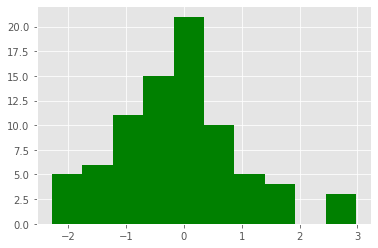

In [106]:
dataset2 = np.random.randn(80)
plt.hist(dataset2,color='green')

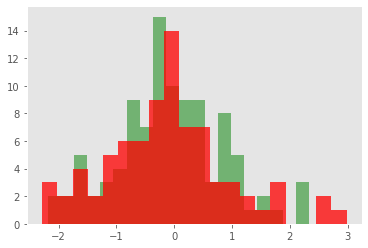

In [108]:
plt.hist(dataset1,color='green',alpha=0.5,bins=20)
plt.hist(dataset2,color='red',alpha=0.75,bins=20)
plt.grid()

# Cálculos complicados (Pivot Tables, etc...)

- No se como funciona esto :(
- Tutorial: http://pbpython.com/pandas-pivot-table-explained.html

In [116]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [117]:
def ranker(df):
    df['alc_cont_rank'] = np.arange(len(df)) + 1
    return df

dframe_wine = dframe_wine.groupby('quality').apply(ranker)

dframe_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_cont_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,0.571429,2
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6,0.428571,4
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,0.441176,5
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,0.514706,2


In [118]:
dframe_wine[dframe_wine.alc_cont_rank == 1].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_cont_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1
